### A. LOAD LIBRARIES & DATA

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# DEFINE CATPPUCCIN MOCHA COLORS
mocha_colors = [
    '#fab387',  # peach
    '#94e2d5',  # teal
    '#b4befe',  # lavender
    '#f5c2e7',  # pink
    '#f9e2af',  # yellow
    '#74c7ec'   # sapphire
]

background_color = '#1e1e2e' # base
text_color = '#cdd6f4'       # text

# SET GLOBAL MATPLOTLIB STYLE FOR CATPPUCCIN MOCHA
plt.style.use('dark_background')
plt.rcParams.update({
    'axes.facecolor': background_color,
    'figure.facecolor': background_color,
    'text.color': text_color,
    'axes.labelcolor': text_color,
    'xtick.color': text_color,
    'ytick.color': text_color,
    'axes.edgecolor': '#313244',  
    'grid.color': '#313244',     
    'font.size': 12,
})

In [3]:
# READ DATA FROM .CSV FILE
df = pd.read_csv('marketing_campaign_dataset.csv')

### B. QUICK INSPECTION OF RAW DATA STRUCTURE

In [4]:
df.head()   
df.tail()
df.shape
df.columns.tolist()
df.describe(include='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

### C. DATA PREPROCESSING

In [5]:
# STRIP COLUMN NAMES
df.columns = df.columns.str.strip()

# REMOVE DEPLICATE ROWS
df = df.drop_duplicates()

# HANDLE MISSING VALUES
missing = df.isnull().sum()
has_missing = missing.sum() > 0

# CLEAN 'ACQUISITION_COST' COLUMN (REMOVE $, COMMA, COVERT TO FLOAT)
df['Acquisition_Cost'] = (
    df['Acquisition_Cost']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

# CONVERT 'DURATION' FROM STRING TO INTEGER
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

# CONVERT 'DATE' TO DATETIME AND EXTRACT MONTH AND YEAR
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# CONVERT 'CAMPAIGN_ID' TO STRING FOR CONSISTENCY
df['Campaign_ID'] = df['Campaign_ID'].astype(str)

In [6]:
# QUICK CHECK: SHOW UNIQUE VALUES 
category_cols = [
    'Company', 'Campaign_Type', 'Target_Audience',
    'Channel_Used', 'Language', 'Customer_Segment'
]

for col in category_cols:
    print(f"Unique values in '{col}':")
    print(df[col].dropna().unique())
    print()

Unique values in 'Company':
['Innovate Industries' 'NexGen Systems' 'Alpha Innovations'
 'DataTech Solutions' 'TechCorp']

Unique values in 'Campaign_Type':
['Email' 'Influencer' 'Display' 'Search' 'Social Media']

Unique values in 'Target_Audience':
['Men 18-24' 'Women 35-44' 'Men 25-34' 'All Ages' 'Women 25-34']

Unique values in 'Channel_Used':
['Google Ads' 'YouTube' 'Instagram' 'Website' 'Facebook' 'Email']

Unique values in 'Language':
['Spanish' 'German' 'French' 'Mandarin' 'English']

Unique values in 'Customer_Segment':
['Health & Wellness' 'Fashionistas' 'Outdoor Adventurers' 'Foodies'
 'Tech Enthusiasts']



In [7]:
# POST-CLEANING STRUCTURE
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  object        
 1   Company           200000 non-null  object        
 2   Campaign_Type     200000 non-null  object        
 3   Target_Audience   200000 non-null  object        
 4   Duration          200000 non-null  int64         
 5   Channel_Used      200000 non-null  object        
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  float64       
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  object        
 10  Language          200000 non-null  object        
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64         
 14  Cust

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Month,Year
count,200000,200000,200000,200000,200000.000000,200000,200000.000000,200000.000000,200000.000000,200000,200000,200000.000000,200000.000000,200000.000000,200000,200000,200000.000000,200000.0
unique,200000,5,5,5,NaN,6,NaN,NaN,NaN,5,5,NaN,NaN,NaN,5,NaN,NaN,NaN
top,199961,TechCorp,Influencer,Men 18-24,NaN,Email,NaN,NaN,NaN,Miami,Mandarin,NaN,NaN,NaN,Foodies,NaN,NaN,NaN
freq,1,40237,40169,40258,NaN,33599,NaN,NaN,NaN,40269,40255,NaN,NaN,NaN,40208,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,37.503975,NaN,0.080070,12504.393040,5.002438,NaN,NaN,549.772030,5507.301520,5.494710,NaN,2021-07-01 23:35:09.600000,6.525480,2021.0
min,NaN,NaN,NaN,NaN,15.000000,NaN,0.010000,5000.000000,2.000000,NaN,NaN,100.000000,1000.000000,1.000000,NaN,2021-01-01 00:00:00,1.000000,2021.0
25%,NaN,NaN,NaN,NaN,30.000000,NaN,0.050000,8739.750000,3.500000,NaN,NaN,325.000000,3266.000000,3.000000,NaN,2021-04-02 00:00:00,4.000000,2021.0
50%,NaN,NaN,NaN,NaN,30.000000,NaN,0.080000,12496.500000,5.010000,NaN,NaN,550.000000,5517.500000,5.000000,NaN,2021-07-02 00:00:00,7.000000,2021.0
75%,NaN,NaN,NaN,NaN,45.000000,NaN,0.120000,16264.000000,6.510000,NaN,NaN,775.000000,7753.000000,8.000000,NaN,2021-10-01 00:00:00,10.000000,2021.0
max,NaN,NaN,NaN,NaN,60.000000,NaN,0.150000,20000.000000,8.000000,NaN,NaN,1000.000000,10000.000000,10.000000,NaN,2021-12-31 00:00:00,12.000000,2021.0


### D. EXPLORATORY DATA ANALYSIS (EDA)

#### I. Campaign Performance Analysis

**1. Prepare Metrics (Group & Calculate)**

In [8]:
# GROUP BY CAMPAIGN_TYPE TO ANALYZE PERFORMANCE METRICS
campaign_perf = df.groupby('Campaign_Type').agg({
    'Conversion_Rate': 'mean',
    'ROI': 'mean',
    'Acquisition_Cost': 'mean',
    'Clicks': 'sum',
    'Impressions': 'sum'
}).reset_index()

# CALCULATE CLICK-THROUGH RATE (CTR)
campaign_perf['CTR'] = campaign_perf['Clicks'] / campaign_perf['Impressions']

**2. Visualize Key Metrics by Campaign Type**

***2.1. Average Conversion Rate by Campaign Type***

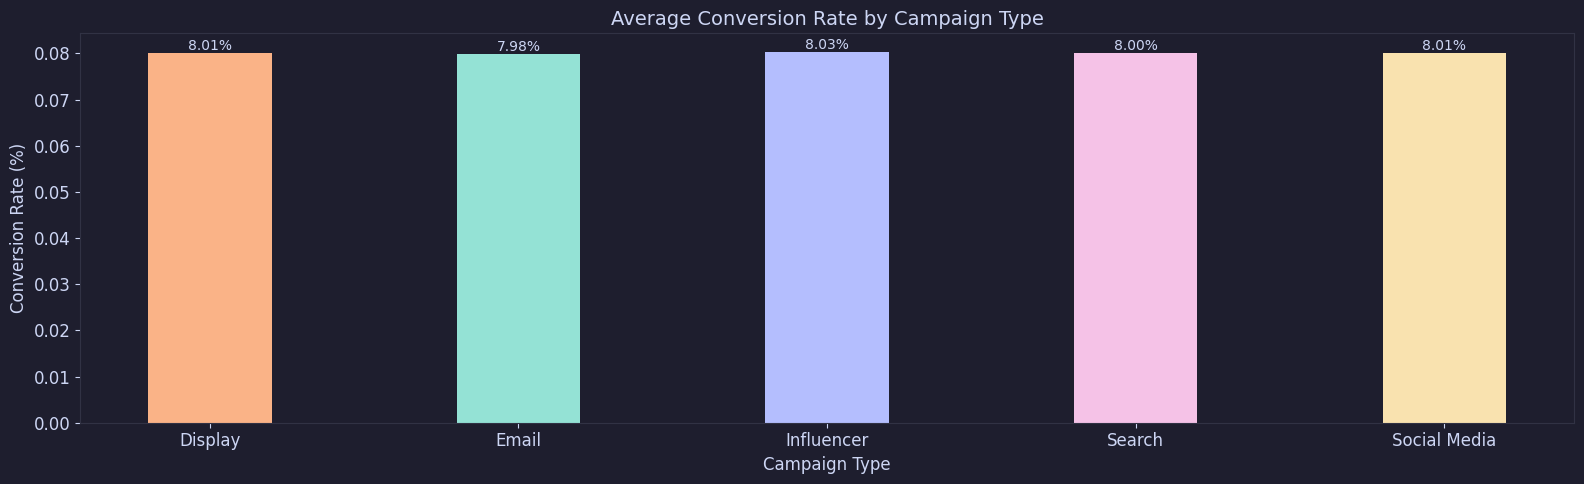

In [9]:
plt.figure(figsize=(16, 5))
bars = plt.bar(campaign_perf['Campaign_Type'], campaign_perf['Conversion_Rate'], 
               color=mocha_colors, width=0.4)  
plt.title('Average Conversion Rate by Campaign Type', fontsize=14)
plt.xlabel('Campaign Type')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=0)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', 
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.grid(False)
plt.show()

Conversion rates across all campaign types remain very close (~8%), with Influencer marginally leading at 8.03%. Since the variation is minimal, further segmentation by audience or channel could uncover actionable insights.

***2.2. Average ROI by Campaign Type***

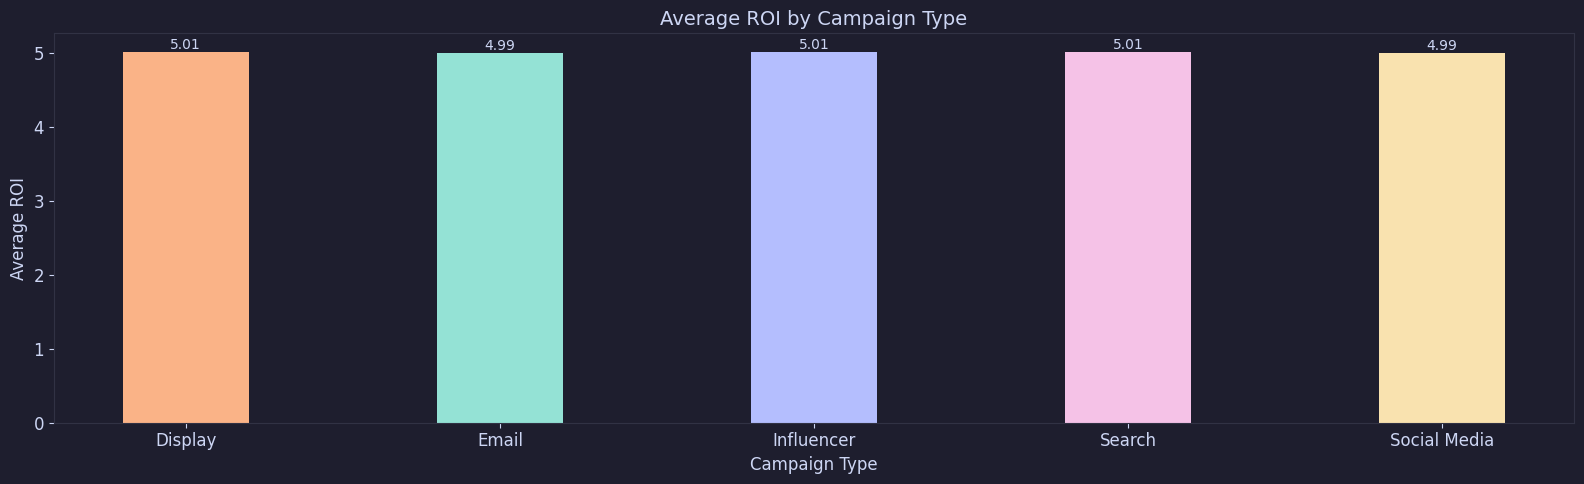

In [10]:
plt.figure(figsize=(16, 5))
bars = plt.bar(campaign_perf['Campaign_Type'], campaign_perf['ROI'], 
               color=mocha_colors, width=0.4)  
plt.title('Average ROI by Campaign Type', fontsize=14)
plt.xlabel('Campaign Type')
plt.ylabel('Average ROI')
plt.xticks(rotation=0)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.grid(False)
plt.show()

ROI across campaign types is very similar (~5.00), with Display, Influencer, and Search marginally ahead (5.01 vs. 4.99). Although differences are minimal, these campaigns may offer slight profitability advantages, warranting a closer look.

***2.3. Average Acquisition Cost by Campaign Type***

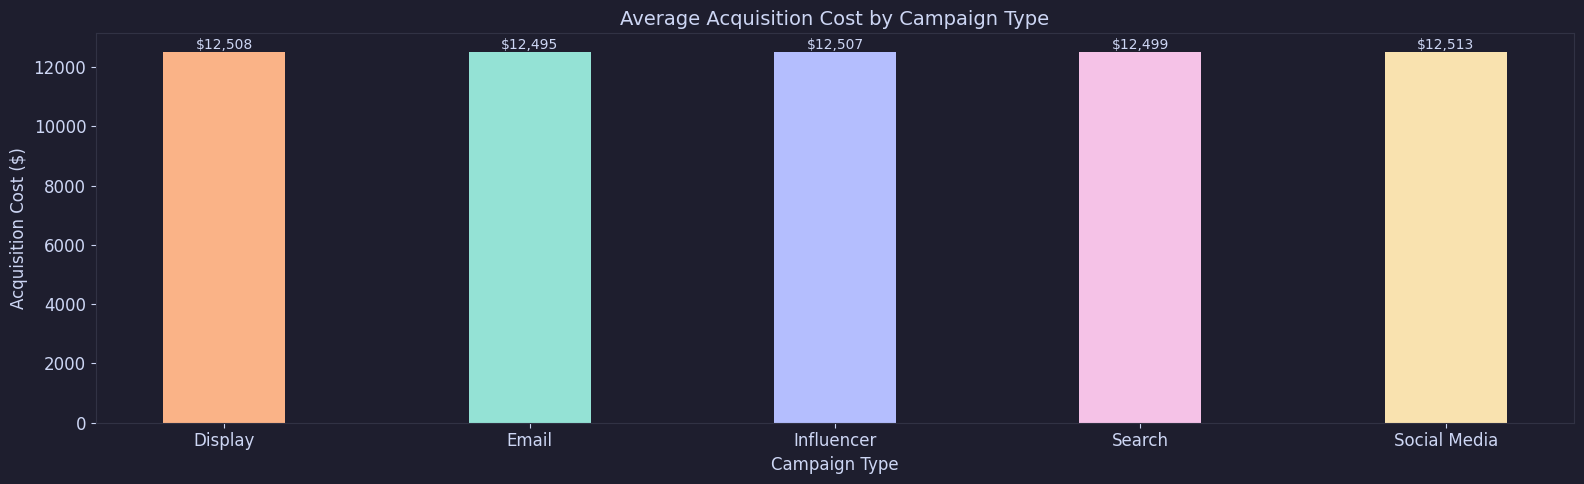

In [11]:
plt.figure(figsize=(16, 5))
bars = plt.bar(campaign_perf['Campaign_Type'], campaign_perf['Acquisition_Cost'], 
               color=mocha_colors, width=0.4)  
plt.title('Average Acquisition Cost by Campaign Type', fontsize=14)
plt.xlabel('Campaign Type')
plt.ylabel('Acquisition Cost ($)')
plt.xticks(rotation=0)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:,.0f}', 
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.grid(False)
plt.show()

Acquisition costs across campaign types are remarkably consistent ($12,495–$12,513), indicating standardized budgeting or targeting strategies. To drive cost efficiencies, further analysis on specific channels or segments may reveal opportunities for optimization.

***2.4. Average CTR by Campaign Type***

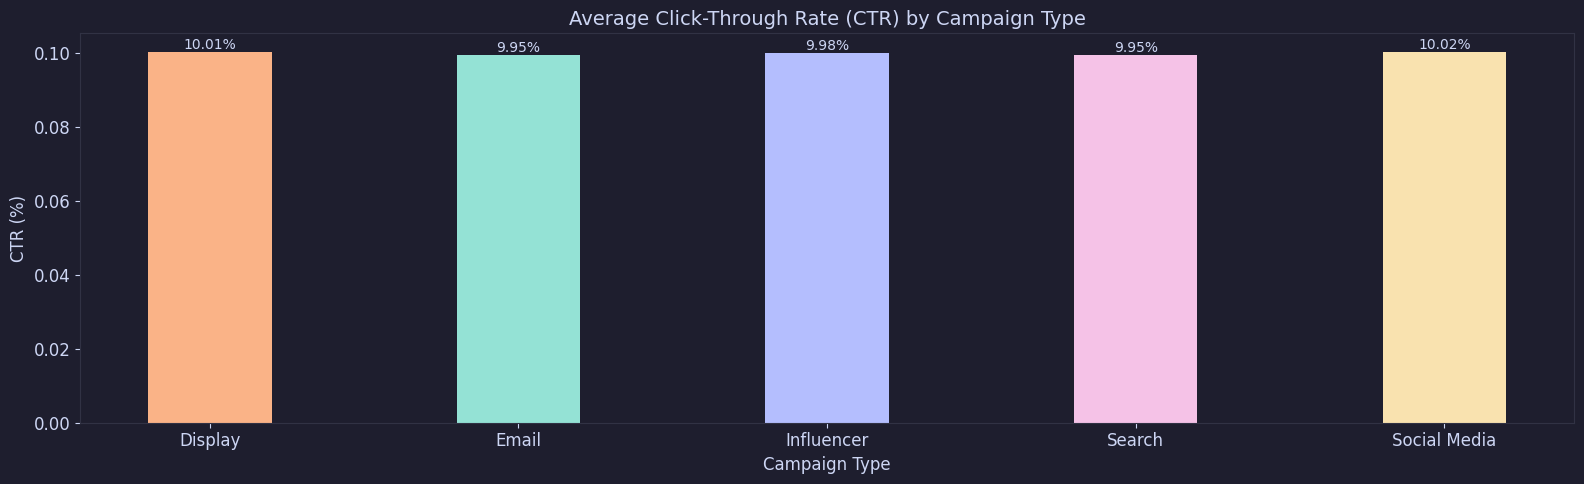

In [12]:
plt.figure(figsize=(16, 5))
bars = plt.bar(campaign_perf['Campaign_Type'], campaign_perf['CTR'], 
               color=mocha_colors, width=0.4)  
plt.title('Average Click-Through Rate (CTR) by Campaign Type', fontsize=14)
plt.xlabel('Campaign Type')
plt.ylabel('CTR (%)')
plt.xticks(rotation=0)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', 
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.grid(False)
plt.show()

Social Media (10.02%) and Display (10.01%) campaigns slightly outperform other types in CTR, making them optimal choices for initial customer engagement.

##### Campaign Performance: Key Highlights and Recommendations

The analysis of campaign performance across key metrics—Conversion Rate, ROI, Acquisition Cost, and CTR—reveals remarkable consistency and limited variation across different campaign types (Display, Email, Influencer, Search, Social Media). This stability indicates that the marketing efforts are well-balanced, with no single campaign type significantly outperforming or underperforming.

**Notable Observations**

- Minimal variability in performance metrics suggests standardized execution and targeting strategies across all campaign types.

- Influencer campaigns show a slight edge in Conversion Rate, and alongside Display and Search, marginally higher ROI, though the differences are minimal and likely not substantial enough for major strategic shifts.

- Acquisition Costs are consistently controlled, indicating effective cost management practices across campaigns.

- Social Media and Display stand out slightly in CTR, highlighting their strengths in initial customer engagement and traffic generation.

**Strategic Recommendations**

- Due to the minimal differences observed, rather than drastically altering current strategies based solely on campaign types, consider conducting deeper, more granular analyses focusing on audience segments, geographic locations, or specific channels to uncover more substantial performance gaps or hidden opportunities.

- Leverage Social Media and Display campaigns more intensively in early-stage customer interactions due to their demonstrated strengths in generating higher click-through rates.

- Continue monitoring closely to identify any emerging trends over time, allowing quick strategic adjustments as necessary, particularly around Influencer, Display, and Search campaigns for incremental ROI improvements.


#### II. Customer Segmentation Analysis

**1. Average Conversion Rate by Customer Segment**

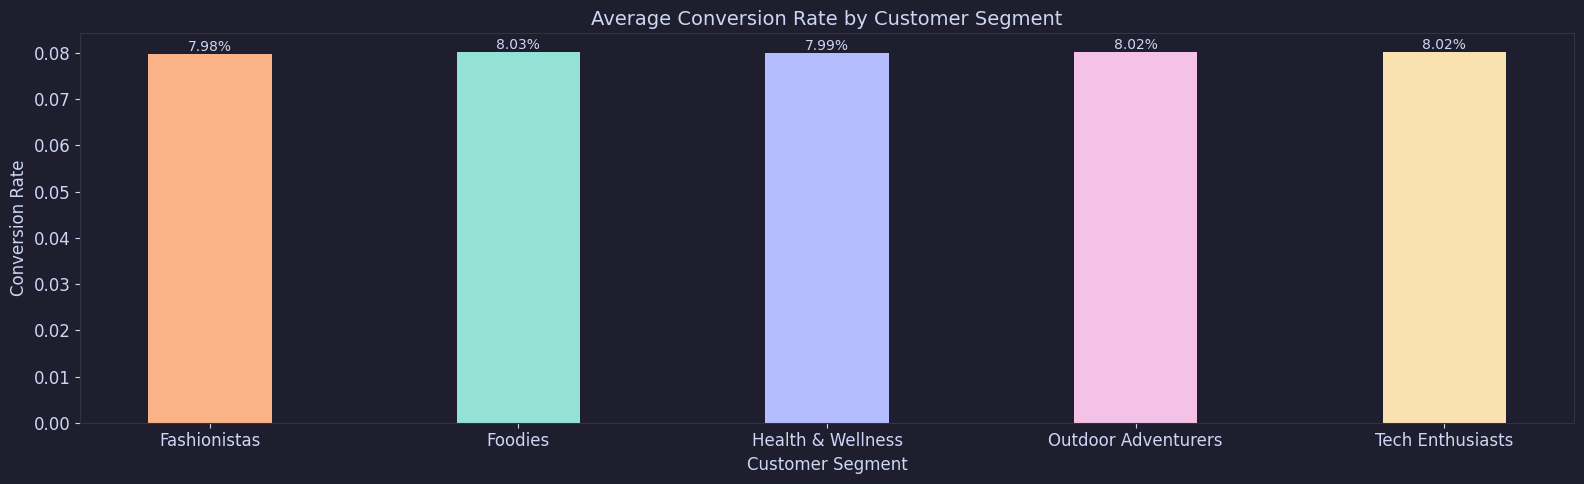

In [13]:
# GROUP BY CUSTOMER_SEGMENT TO CALCULATE AVERAGE CONVERSION RATE
segment_perf = df.groupby('Customer_Segment')['Conversion_Rate'].mean().reset_index()

# PLOT BAR CHART
plt.figure(figsize=(16, 5))
bars = plt.bar(segment_perf['Customer_Segment'], segment_perf['Conversion_Rate'],
               color=mocha_colors,  
               width=0.4)  

plt.title('Average Conversion Rate by Customer Segment', fontsize=14)
plt.xlabel('Customer Segment')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

Conversion rates are consistently strong (~8%) across all customer segments, with Foodies marginally leading at 8.03%. The minimal variation implies broad effectiveness of campaigns without segment-specific optimization.

**2. Average Engagement Score by Customer Segment**

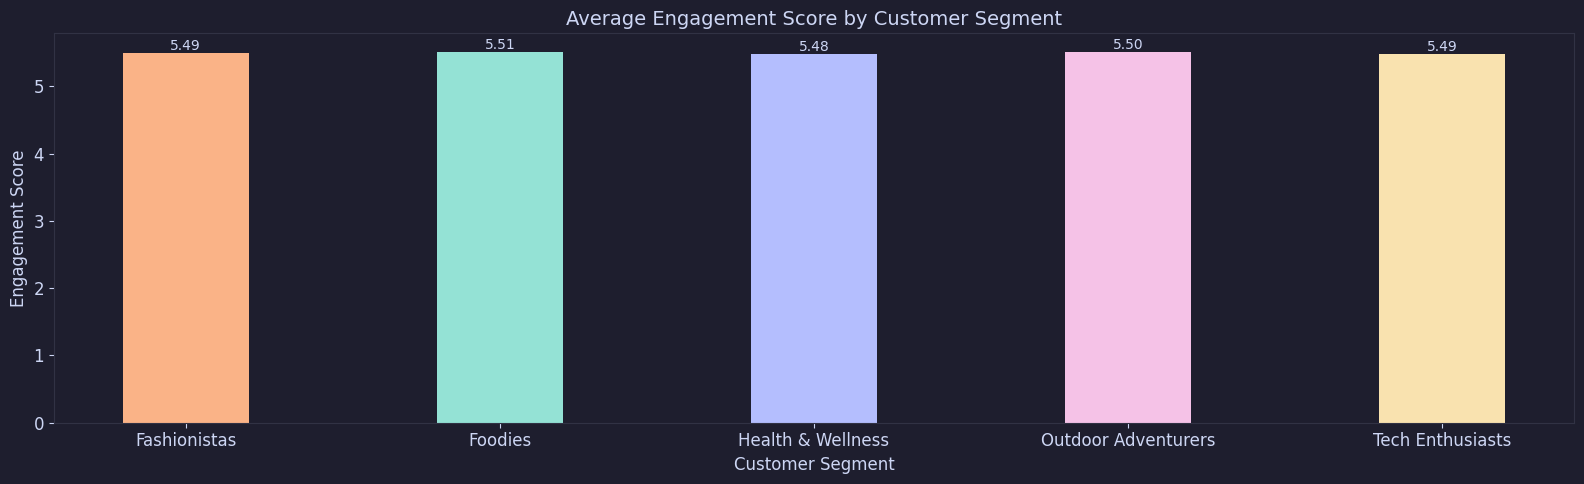

In [14]:
# GROUP BY CUSTOMER_SEGMENT TO CALCULATE AVERAGE ENGAGEMENT SCORE
engagement_perf = df.groupby('Customer_Segment')['Engagement_Score'].mean().reset_index()

# PLOT BAR CHART
plt.figure(figsize=(16, 5))
bars = plt.bar(engagement_perf['Customer_Segment'], engagement_perf['Engagement_Score'],
               color=mocha_colors,  
               width=0.4)

plt.title('Average Engagement Score by Customer Segment', fontsize=14)
plt.xlabel('Customer Segment')
plt.ylabel('Engagement Score')
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

Engagement scores remain stable (~5.5) across all customer segments. Foodies slightly outperform others, though the difference is minimal, indicating uniformly effective engagement strategies.

**3. Heatmap: Target Audience × Campaign Type × Channel Used (Conversion Rate)**

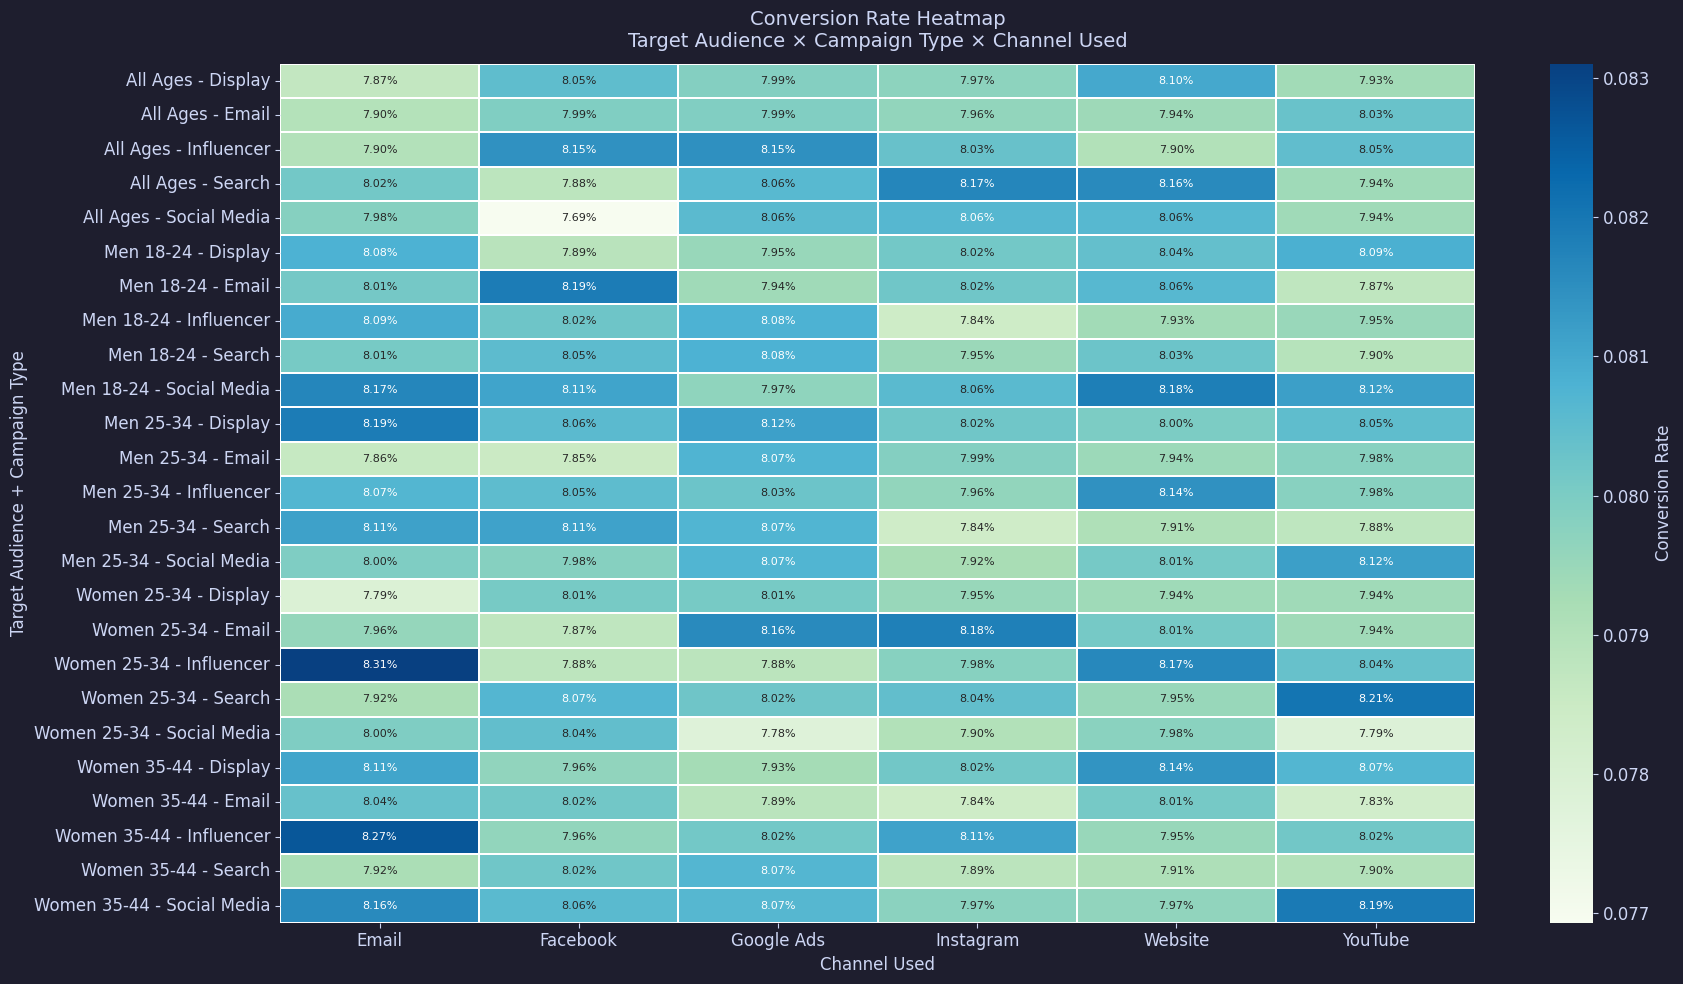

In [15]:
# CREATE A COMBINED COLUMN: 'TARGET_AUDIENCE' + 'CAMPAIGN_TYPE'
df['Audience_Campaign'] = df['Target_Audience'] + ' - ' + df['Campaign_Type']

# CREATE A PIVOT TABLE: ROWS = AUDIENCE_CAMPAIGN, COLUMNS = CHANNEL_USED, VALUES = AVERAGE CONVERSION RATE
pivot = df.pivot_table(
    values='Conversion_Rate',
    index='Audience_Campaign',
    columns='Channel_Used',
    aggfunc='mean'
)

# PLOT HEATMAP
plt.figure(figsize=(18, 10))
sns.heatmap(
    pivot,
    annot=True,
    fmt='.2%',
    cmap='GnBu',
    linewidths=0.3,
    cbar_kws={'label': 'Conversion Rate'},
    annot_kws={'fontsize': 8}
)

plt.title('Conversion Rate Heatmap\nTarget Audience × Campaign Type × Channel Used', fontsize=14, pad=12)
plt.xlabel('Channel Used')
plt.ylabel('Target Audience + Campaign Type')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
# FLATTEN THE PIVOT TABLE TO LONG FORMAT FOR RANKING
pivot_long = pivot.reset_index().melt(id_vars='Audience_Campaign',
                                      var_name='Channel_Used',
                                      value_name='Conversion_Rate')

# DROP ROWS WITH MISSING VALUES
pivot_long = pivot_long.dropna()

# SORT TO GET BEST & WORST PERFORMING COMBINATIONS
top_combinations = pivot_long.sort_values(by='Conversion_Rate', ascending=False).head(10)
bottom_combinations = pivot_long.sort_values(by='Conversion_Rate', ascending=True).head(10)

# DISPLAY RESULTS
print("Top 10 Best Performing Combinations (by Conversion Rate)")
display(top_combinations)

print("Bottom 10 Worst Performing Combinations (by Conversion Rate)")
display(bottom_combinations)

Top 10 Best Performing Combinations (by Conversion Rate)


,Audience_Campaign,Channel_Used,Conversion_Rate
17,Women 25-34 - Influencer,Email,0.083103
22,Women 35-44 - Influencer,Email,0.082669
143,Women 25-34 - Search,YouTube,0.082064
149,Women 35-44 - Social Media,YouTube,0.081941
31,Men 18-24 - Email,Facebook,0.081877
10,Men 25-34 - Display,Email,0.081875
109,Men 18-24 - Social Media,Website,0.081832
91,Women 25-34 - Email,Instagram,0.081820
9,Men 18-24 - Social Media,Email,0.081703
78,All Ages - Search,Instagram,0.081700


Bottom 10 Worst Performing Combinations (by Conversion Rate)


,Audience_Campaign,Channel_Used,Conversion_Rate
29,All Ages - Social Media,Facebook,0.076932
69,Women 25-34 - Social Media,Google Ads,0.077781
144,Women 25-34 - Social Media,YouTube,0.077857
15,Women 25-34 - Display,Email,0.077909
146,Women 35-44 - Email,YouTube,0.078265
88,Men 25-34 - Search,Instagram,0.078375
82,Men 18-24 - Influencer,Instagram,0.078408
96,Women 35-44 - Email,Instagram,0.078412
36,Men 25-34 - Email,Facebook,0.078514
11,Men 25-34 - Email,Email,0.078606


Conversion rates range moderately (7.7%–8.3%) across detailed audience-channel combinations. 

Top performers—especially Influencer campaigns via Email targeting women aged 25–44—highlight strong potential in personalized, direct approaches. 

Conversely, broader targeting (e.g., Social Media campaigns for 'All Ages' or general women audiences on Facebook, Google Ads, and YouTube) consistently underperforms. 

These results suggest optimizing Social Media tactics toward more targeted, customized approaches for improved conversion outcomes.

##### Customer Segmentation: Key Highlights and Recommendations

The customer segmentation analysis highlights consistently stable performance across customer segments (Fashionistas, Foodies, Health & Wellness, Outdoor Adventurers, Tech Enthusiasts), with minimal variation in both Conversion Rate (~8%) and Engagement Score (~5.5). Campaign effectiveness appears balanced, indicating standardized targeting strategies across segments.

**Notable Observations**

- Stable Segment Performance: Consistent conversion rates and engagement scores suggest broad effectiveness of current marketing campaigns, with minimal segment-specific gaps to address urgently.

- Foodies Segment Slightly Ahead: The Foodies segment consistently demonstrates marginally superior performance (Conversion: 8.03%, Engagement: 5.51). This subtle lead indicates a slightly stronger alignment between campaign messaging and this segment's interests or behaviors, presenting potential insights for future campaign enhancements.

- Insights from Audience-Channel Combinations: Granular heatmap analysis identifies notably high-performing combinations involving targeted Influencer and Search campaigns via direct, trusted channels (Email, YouTube), particularly for women aged 25–44. Conversely, broader Social Media targeting (Facebook, Google Ads, YouTube) consistently demonstrates lower effectiveness, suggesting suboptimal alignment with broad or mid-funnel audiences.

**Strategic Recommendations**

- Prioritize Personalized, Direct-Channel Campaigns: Given the demonstrated effectiveness of highly personalized Influencer and Search campaigns for targeted audiences (e.g., women aged 25–44 via Email), marketing efforts should emphasize precise targeting strategies and direct communication channels to enhance overall conversion.

- Reevaluate and Refine Social Media Targeting: Social Media campaigns targeting broad audience segments currently yield lower conversions. Revisit and refine these approaches by focusing on narrower, more personalized audience segments to better align messaging and improve performance.

- Conduct Deeper Analysis into High-Performing Combinations: Further investigate key success factors behind the top-performing audience-channel combinations identified. Understanding the underlying drivers of performance will help replicate these successes across other audience segments and maximize overall marketing ROI.

#### III. Channel Effectiveness

**1. Channel Usage Distribution**

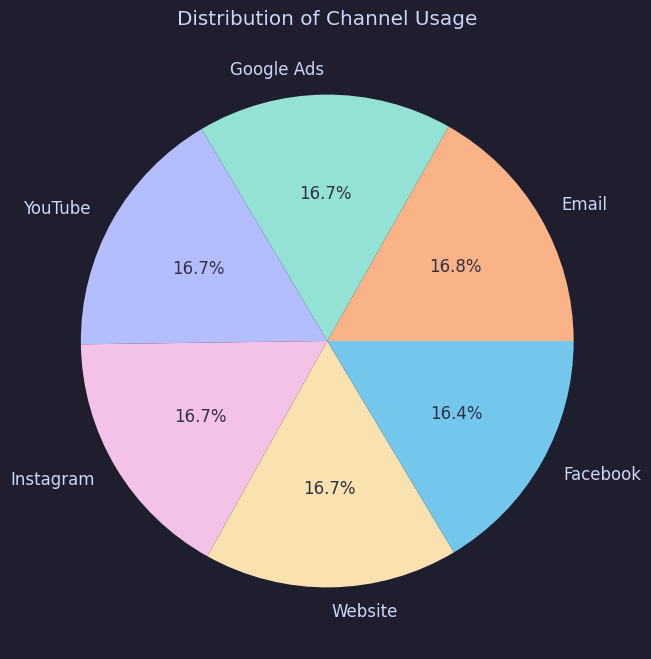

In [17]:
# CALCULATE THE FREQUENCY OF EACH CHANNEL USED
channel_counts = df['Channel_Used'].value_counts()

# CREATE A PIE CHART TO VISUALIZE CHANNEL USAGE DISTRIBUTION
plt.figure(figsize=(8, 8))
pie, texts, autotexts = plt.pie(
    channel_counts, 
    labels=channel_counts.index, 
    autopct='%1.1f%%', 
    colors=mocha_colors[:len(channel_counts)]  
)

# SET THE COLOR OF PERCENTAGE TEXT IN THE PIE CHART
for autotext in autotexts:
    autotext.set_color('#313244')  

# DISPLAY THE PIE CHART WITH A TITLE
plt.title('Distribution of Channel Usage', color='#cdd6f4')
plt.show()

Channel usage is evenly distributed across all six platforms, with each accounting for roughly 16.7% of campaign delivery. 

This balanced approach suggests that resources are currently being allocated uniformly across channels. However, further optimization may be possible by aligning allocation more closely with channel performance metrics such as ROI and Conversion Rate.

**2. Average ROI, Conversion Rate, Engagement Score by Channel**

In [18]:
# GROUP BY CHANNEL TO CALCULATE AVERAGE ROI, CR, AND ENGAGEMENT SCORE
channel_perf = df.groupby('Channel_Used').agg({
    'ROI': 'mean',
    'Conversion_Rate': 'mean',
    'Engagement_Score': 'mean'
}).reset_index()

***2.1. Average ROI by Channel***

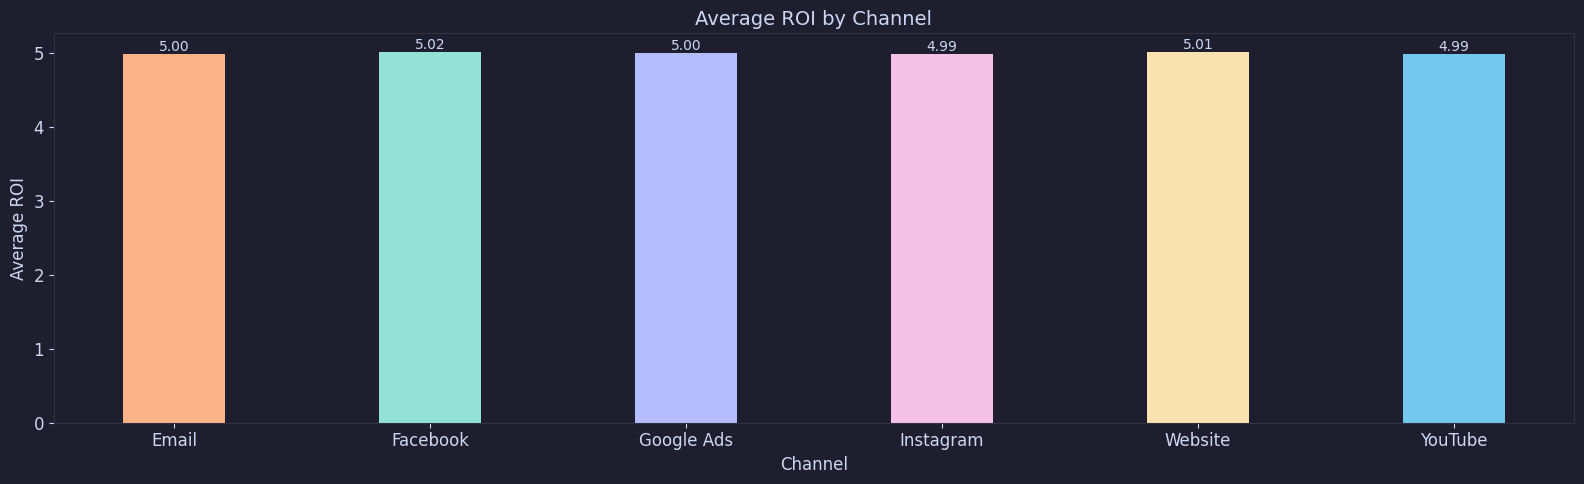

In [19]:
plt.figure(figsize=(16,5))
bars = plt.bar(channel_perf['Channel_Used'], channel_perf['ROI'],
               color=mocha_colors,  
               width=0.4)

plt.title('Average ROI by Channel', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('Average ROI')
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

ROI is highly consistent across channels (4.99–5.02). While Facebook shows a slight edge at 5.02, the margin is minimal. Rather than reallocate budgets drastically, consider experimenting with new approaches on Instagram and YouTube to close the gap and validate performance potential.

***2.2. Average Conversion Rate by Channel***

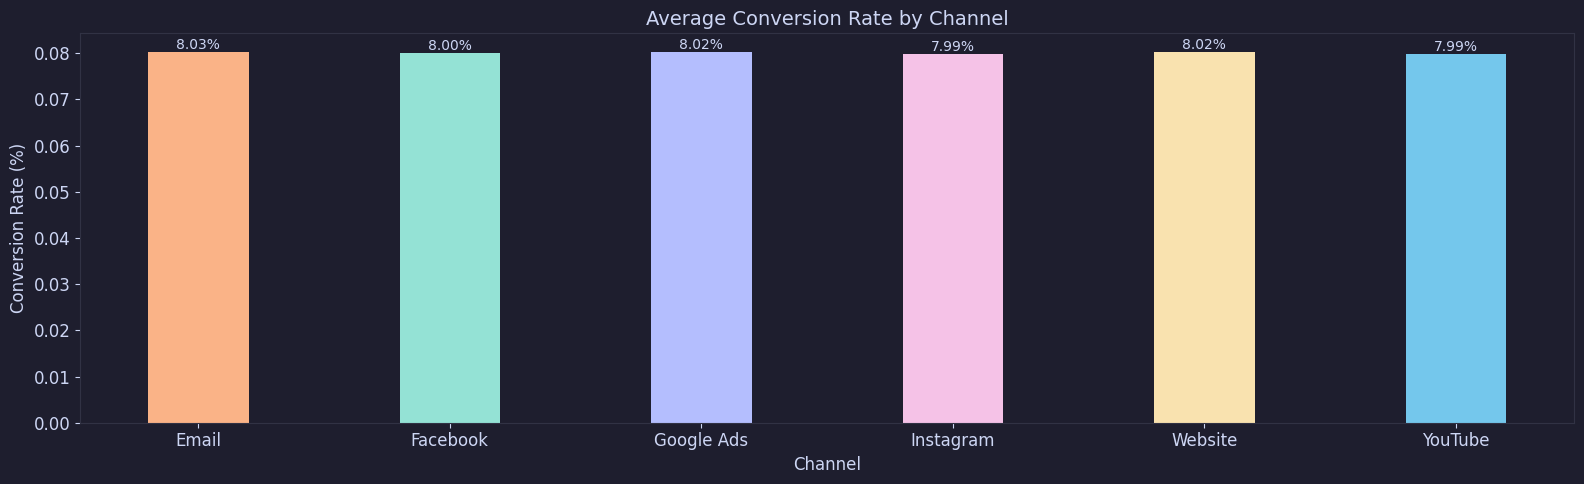

In [20]:
plt.figure(figsize=(16, 5))
bars = plt.bar(channel_perf['Channel_Used'], channel_perf['Conversion_Rate'],
               color=mocha_colors,  
               width=0.4)

plt.title('Average Conversion Rate by Channel', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

Conversion rates are nearly identical across channels (7.99%–8.03%), with Email marginally leading. Although differences are small, Email may be worth slightly more emphasis, while Instagram and YouTube could benefit from light optimization to match top-performing channels.

***2.3. Average Engagement Score by Channel***

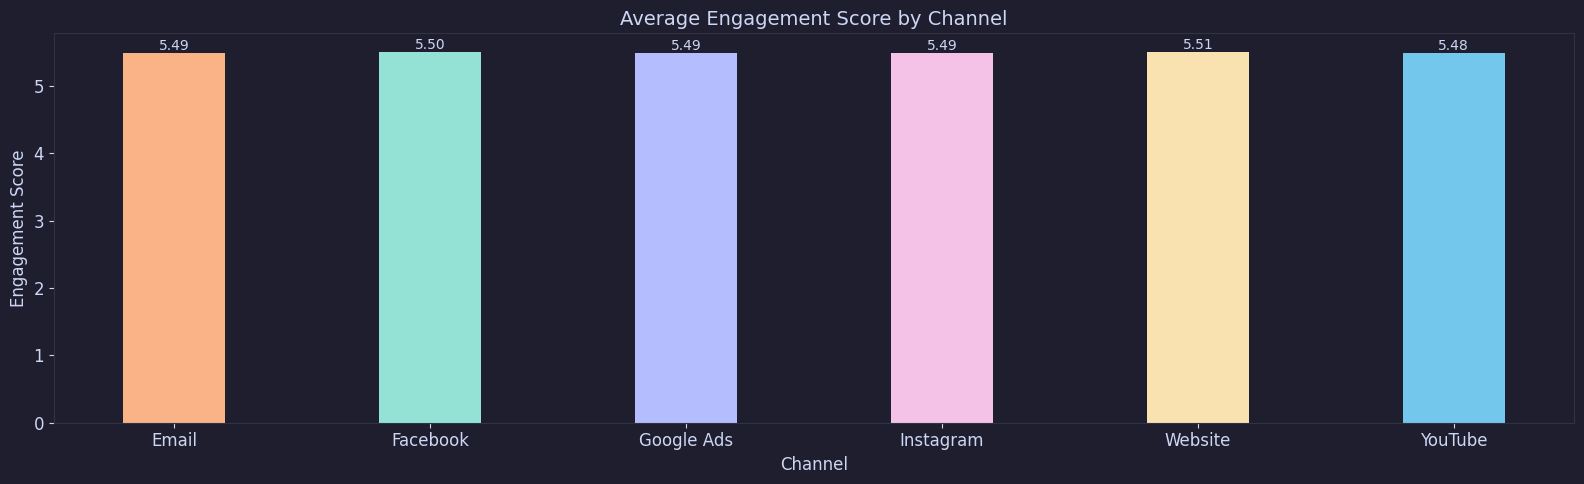

In [21]:
plt.figure(figsize=(16, 5))
bars = plt.bar(channel_perf['Channel_Used'], channel_perf['Engagement_Score'],
               color=mocha_colors,  
               width=0.4)

plt.title('Average Engagement Score by Channel', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('Engagement Score')
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

Engagement levels are consistent across all channels (5.48–5.51). Website leads slightly, indicating potential for further exploration. YouTube may benefit from content or format adjustments to elevate engagement in line with other channels.

**3. Average Acquisition Cost by Channel**

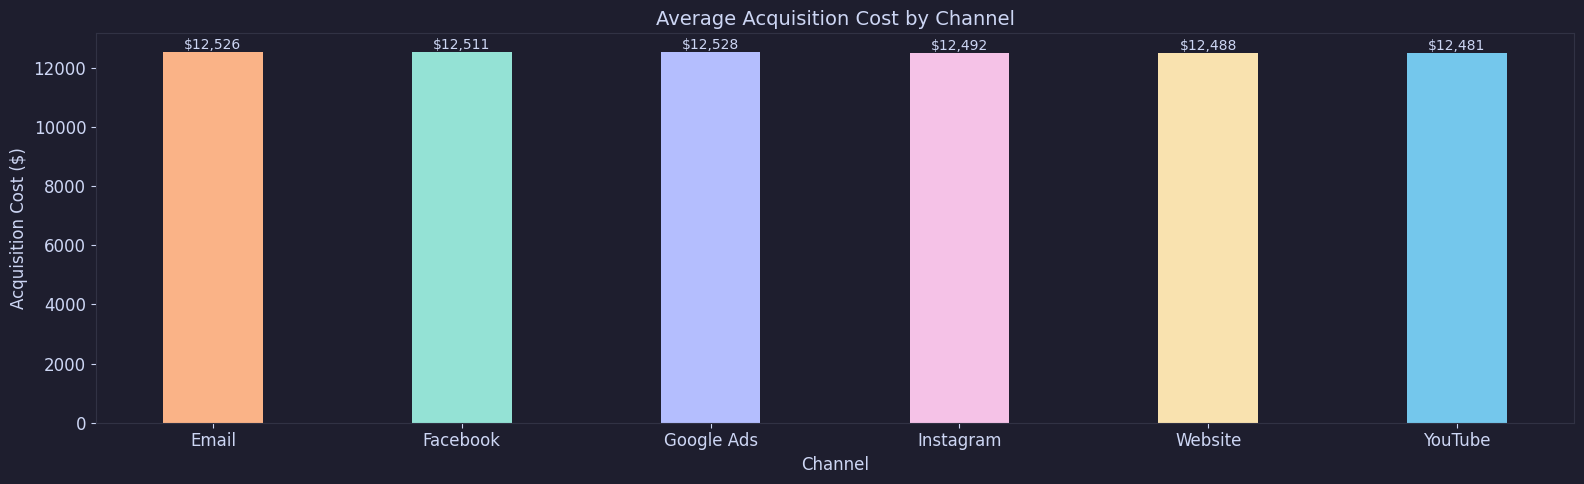

In [22]:
acquisition_by_channel = df.groupby('Channel_Used')['Acquisition_Cost'].mean().reset_index()

plt.figure(figsize=(16, 5))
bars = plt.bar(acquisition_by_channel['Channel_Used'], acquisition_by_channel['Acquisition_Cost'],
               color=mocha_colors,  
               width=0.4)

plt.title('Average Acquisition Cost by Channel', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('Acquisition Cost ($)')
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

Acquisition costs are tightly grouped ($12,481–$12,526), suggesting well-managed spending across channels. YouTube, as the lowest-cost channel, may be explored further for budget scaling. Channels with higher costs like Google Ads and Email should be reviewed to ensure their performance justifies the additional expense.

##### Channel Effectiveness: Key Highlights and Recommendations

The analysis of channel effectiveness across key metrics—including Conversion Rate, ROI, Engagement Score, and Acquisition Cost—reveals a high level of consistency across all platforms. The uniform distribution of campaign usage and the narrow performance range across metrics indicate a balanced, well-managed multi-channel strategy with limited volatility.

**Notable Observations**

- Even Distribution, Minimal Gaps: Campaigns are evenly distributed across Email, Facebook, Instagram, Google Ads, YouTube, and Website, with each channel showing very similar performance. ROI fluctuates within a tight 0.03-point range (4.99–5.02), and Conversion Rates differ by just 0.04%, indicating strong consistency.

- Subtle Channel-Level Strengths: Email and Website show marginally higher performance in Conversion Rate and Engagement Score respectively, while Facebook leads slightly in ROI. YouTube emerges as the lowest-cost channel, creating a potentially favorable cost-efficiency profile.

- Opportunities for Fine-Tuning: Although performance gaps are small, channels like Instagram and YouTube slightly trail in ROI and Conversion, suggesting opportunities for testing and content optimization.

**Strategic Recommendations**

- Maintain Balanced Channel Mix: Given the strong performance uniformity, continue leveraging a diversified channel approach while preserving flexibility for minor reallocation based on future trends.

- Optimize Underperforming Channels Through Testing: Channels like Instagram and YouTube may benefit from adjusted targeting, messaging formats, or campaign timing to enhance ROI and engagement.

- Leverage Strengths Where Evident: Capitalize on Email’s slightly higher conversion rate in mid-to-bottom funnel strategies, and consider Website for engagement-focused campaigns given its top score in user interaction.

- Review High-Cost Channels for ROI Justification: With Email and Google Ads showing the highest acquisition costs, a closer look at conversion efficiency and downstream value is recommended to ensure spend effectiveness.

#### IV. Temporal Trend Analysis

**1. Monthly Conversion Rate Trend**

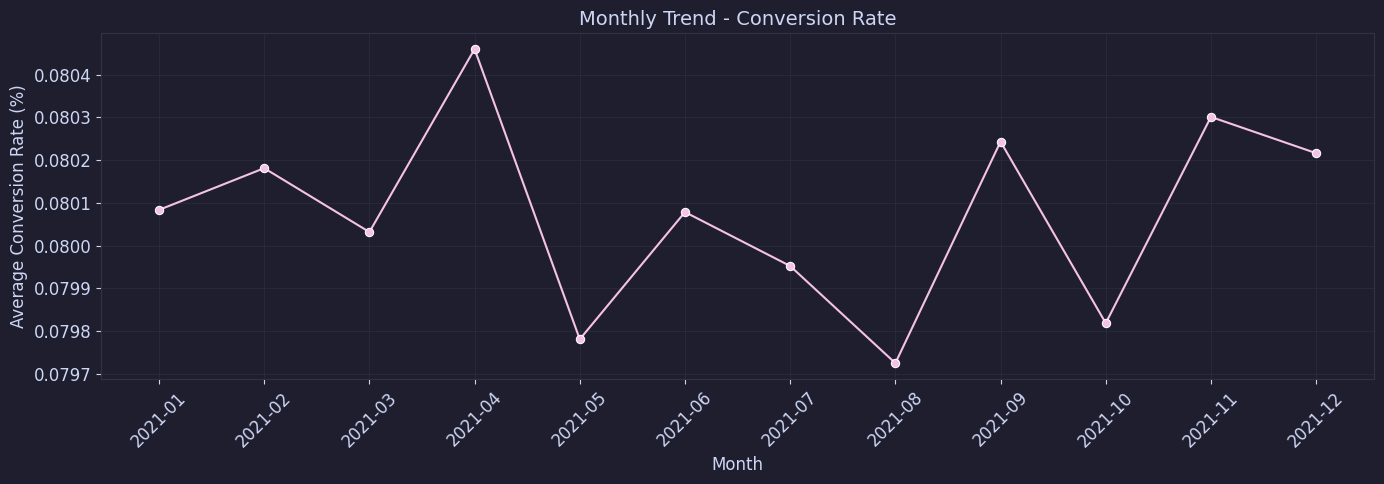

In [23]:
# AGGREGATE MONTHLY PERFORMANCE
monthly_perf = df.groupby(['Year', 'Month']).agg({
    'Conversion_Rate': 'mean',
    'ROI': 'mean',
    'Engagement_Score': 'mean'
}).reset_index()

# CREATE READABLE MONTH LABEL
monthly_perf['Month_Label'] = monthly_perf['Month'].apply(lambda x: f'{x:02}')
monthly_perf['Period'] = monthly_perf['Year'].astype(str) + '-' + monthly_perf['Month_Label']

# PLOT: MONTHLY CONVERSION RATE TREND
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_perf, x='Period', y='Conversion_Rate', marker='o', color='#f5c2e7')
plt.title('Monthly Trend - Conversion Rate', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Conversion Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

Conversion rates remained stable throughout 2021, ranging narrowly from 7.97% to 8.30%. 

Peaks occurred in April (8.05%), while lows appeared in midsummer—particularly August (7.97%). 

This trend suggests that spring and late autumn are strong periods for conversion, whereas mid-year campaigns may benefit from refreshed creatives or promotional pushes.

**2. Monthly ROI Trend**

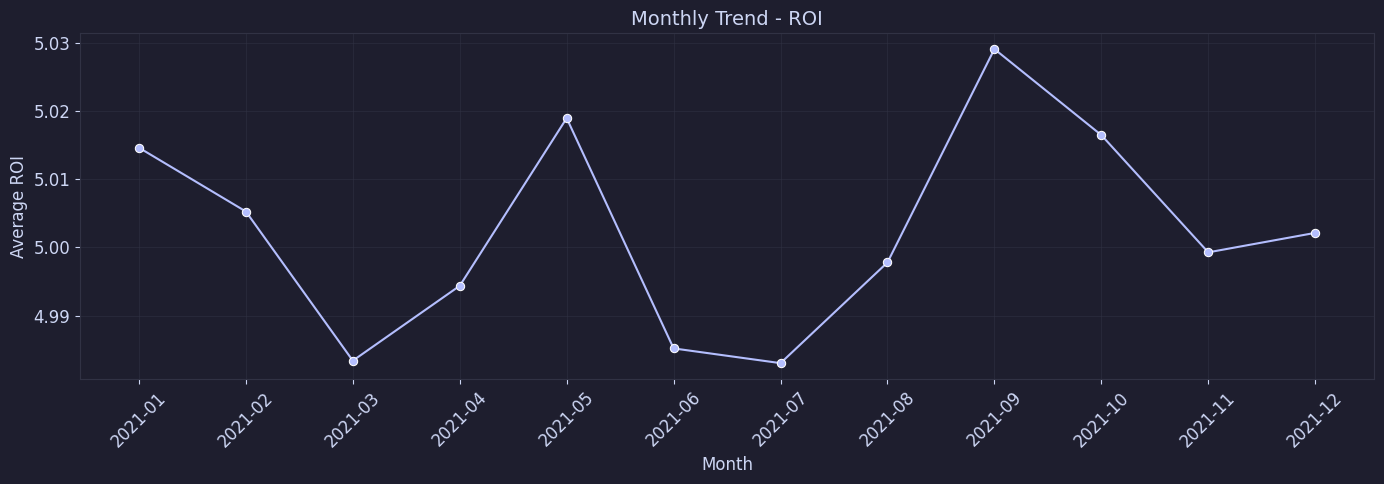

In [24]:
# PLOT: MONTHLY ROI TREND
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_perf, x='Period', y='ROI', marker='o', color='#b4befe')
plt.title('Monthly Trend - ROI', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.grid(True, linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

ROI remained consistent throughout the year, fluctuating slightly between 4.93 and 5.03. 

The lowest points appeared in March and July (both 4.93), while September delivered the strongest return (5.03). 

This indicates potential for performance refinement during mid-year campaigns, with spring and early autumn emerging as high-return periods.

**3. Monthly Engagement Score**

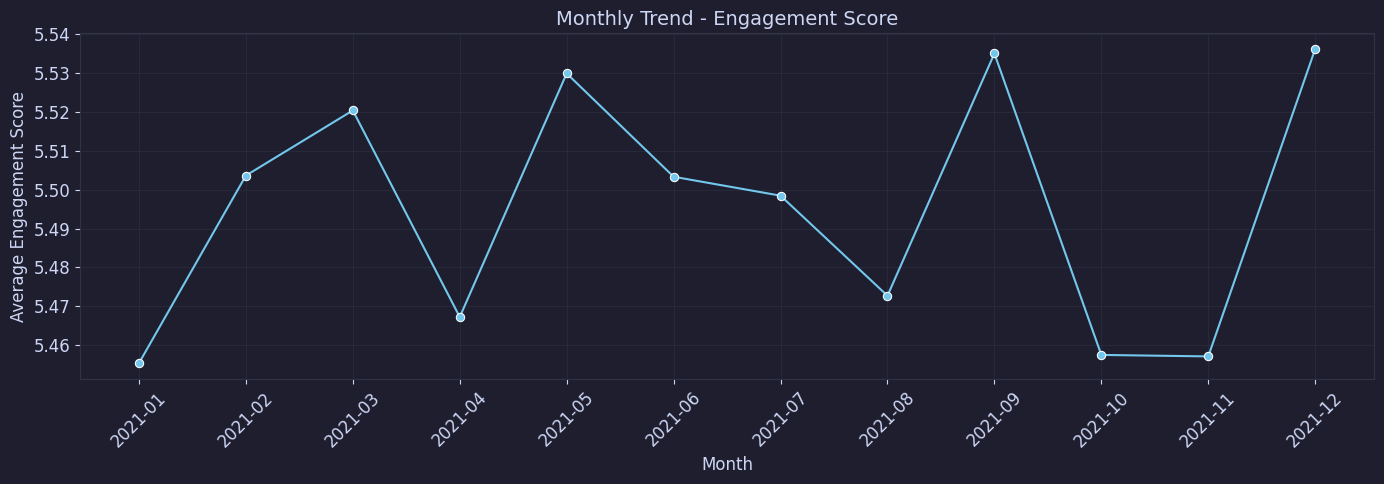

In [25]:
# PLOT: MONTHLY ENGAGEMENT SCORE TREND
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_perf, x='Period', y='Engagement_Score', marker='o', color='#74c7ec')
plt.title('Monthly Trend - Engagement Score', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)
plt.grid(True, linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

Engagement scores were steady year-round, ranging from 5.46 to 5.54. Peaks in May, September, and December indicate higher user interaction during spring and year-end campaigns, while dips in January and October–November suggest quieter engagement periods.

##### Temporal Trend Analysis: Key Highlights and Recommendations

The analysis of channel effectiveness across key metrics—including Conversion Rate, ROI, Engagement Score, and Acquisition Cost—reveals a high level of consistency across all platforms. The uniform distribution of campaign usage and the narrow performance range across metrics indicate a balanced, well-managed multi-channel strategy with limited volatility.

**Notable Observations**

- Even Distribution, Minimal Gaps: Campaigns are evenly distributed across Email, Facebook, Instagram, Google Ads, YouTube, and Website, with each channel showing very similar performance. ROI fluctuates within a tight 0.03-point range (4.99–5.02), and Conversion Rates differ by just 0.04%, indicating strong consistency.

- Subtle Channel-Level Strengths: EEmail and Website show marginally higher performance in Conversion Rate and Engagement Score respectively, while Facebook leads slightly in ROI. YouTube emerges as the lowest-cost channel, creating a potentially favorable cost-efficiency profile.

- Opportunities for Fine-Tuning: Although performance gaps are small, channels like Instagram and YouTube slightly trail in ROI and Conversion, suggesting opportunities for testing and content optimization.

**Strategic Recommendations**

- Maintain Balanced Channel Mix: Given the strong performance uniformity, continue leveraging a diversified channel approach while preserving flexibility for minor reallocation based on future trends.

- Optimize Underperforming Channels Through Testing: Channels like Instagram and YouTube may benefit from adjusted targeting, messaging formats, or campaign timing to enhance ROI and engagement.

- Leverage Strengths Where Evident: Capitalize on Email’s slightly higher conversion rate in mid-to-bottom funnel strategies, and consider Website for engagement-focused campaigns given its top score in user interaction.

- Review High-Cost Channels for ROI Justification: With Email and Google Ads showing the highest acquisition costs, a closer look at conversion efficiency and downstream value is recommended to ensure spend effectiveness.

#### V. Geographic & Language Insights

**1. KPI by Location**

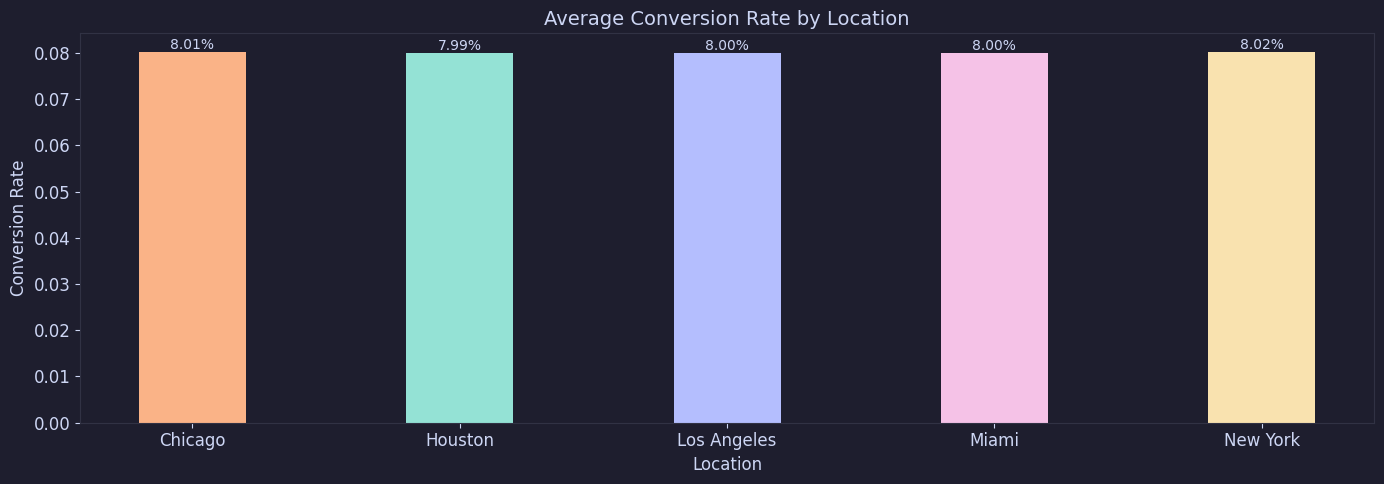

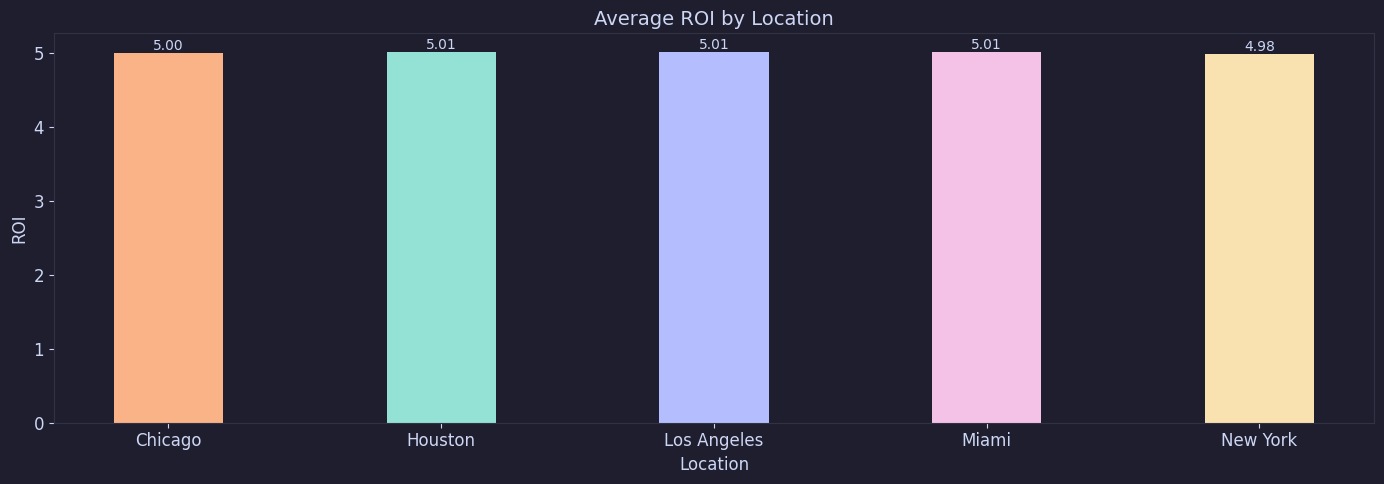

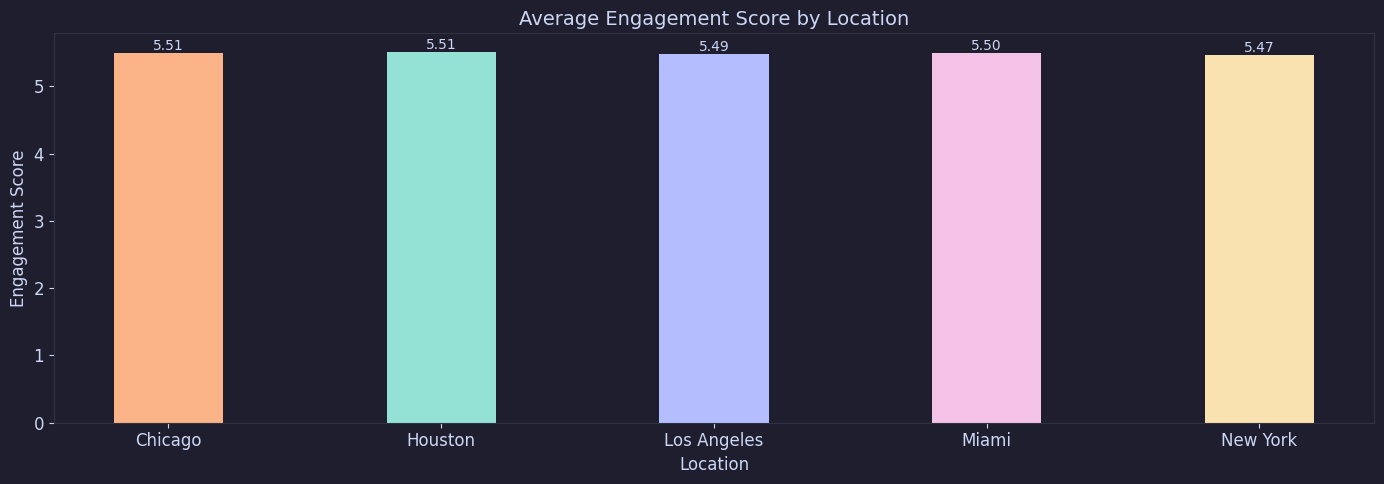

In [26]:
# GROUP METRICS BY LOCATION
location_perf = df.groupby('Location').agg({
    'Conversion_Rate': 'mean',
    'ROI': 'mean',
    'Engagement_Score': 'mean'
}).reset_index()

# BAR CHART: AVERAGE CONVERSION RATE BY LOCATION
plt.figure(figsize=(14, 5))
bars = plt.bar(location_perf['Location'], location_perf['Conversion_Rate'],
               color=mocha_colors,  
               width=0.4)

plt.title('Average Conversion Rate by Location', fontsize=14)
plt.xlabel('Location')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

# BAR CHART: AVERAGE ROI BY LOCATION
plt.figure(figsize=(14, 5))
bars = plt.bar(location_perf['Location'], location_perf['ROI'],
               color=mocha_colors,  
               width=0.4)

plt.title('Average ROI by Location', fontsize=14)
plt.xlabel('Location')
plt.ylabel('ROI')
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

# BAR CHART: AVERAGE ENGAGEMENT SCORE BY LOCATION
plt.figure(figsize=(14, 5))
bars = plt.bar(location_perf['Location'], location_perf['Engagement_Score'],
               color=mocha_colors,  
               width=0.4)

plt.title('Average Engagement Score by Location', fontsize=14)
plt.xlabel('Location')
plt.ylabel('Engagement Score')
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

Across the five regions—Chicago, Houston, Los Angeles, Miami, and New York—key performance metrics show minimal variance (CR: 7.99–8.02%, ROI: 4.98–5.01, Engagement Score: 5.47–5.51), indicating overall campaign consistency with subtle regional nuances.

New York delivers one of the highest conversion rates (8.02%) but simultaneously ranks lowest in ROI (4.98) and engagement (5.47), suggesting strong top-funnel appeal but weaker downstream performance.

Houston and Los Angeles show the most balanced profiles, combining peak ROI (5.01) with high engagement. Chicago also stands out with joint-top engagement (5.51) and solid conversion (8.01%), while Miami remains strong across all three dimensions.

**2. KPI by Language**

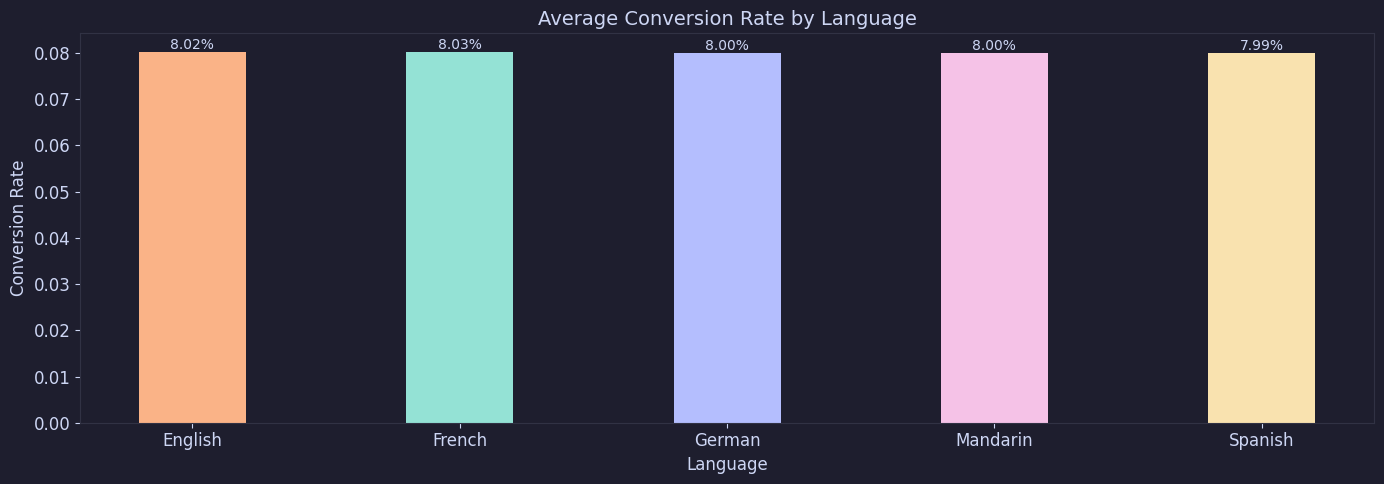

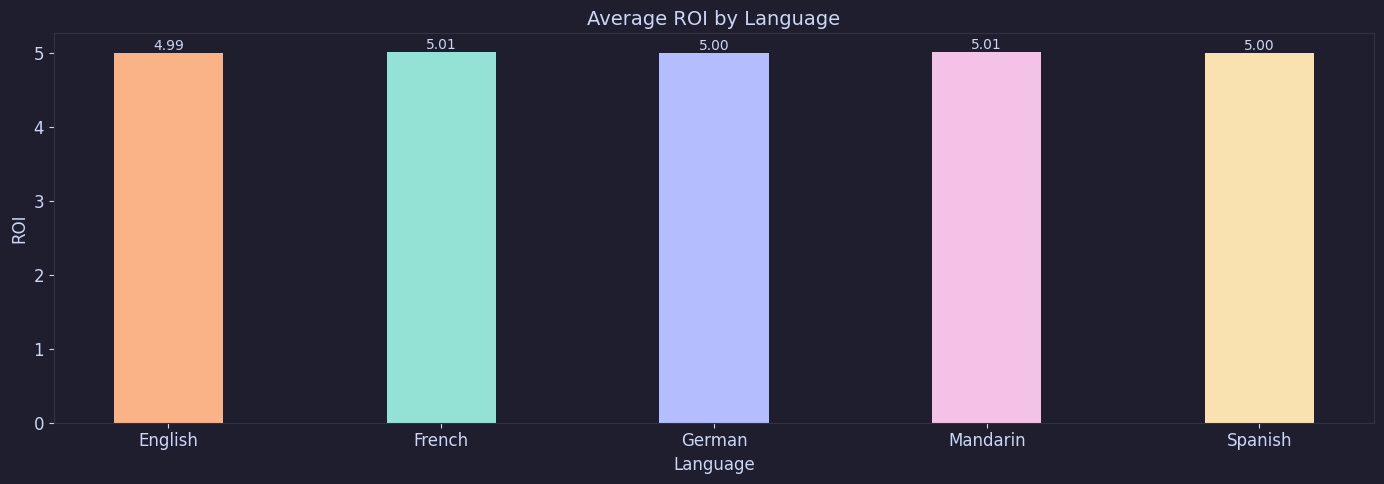

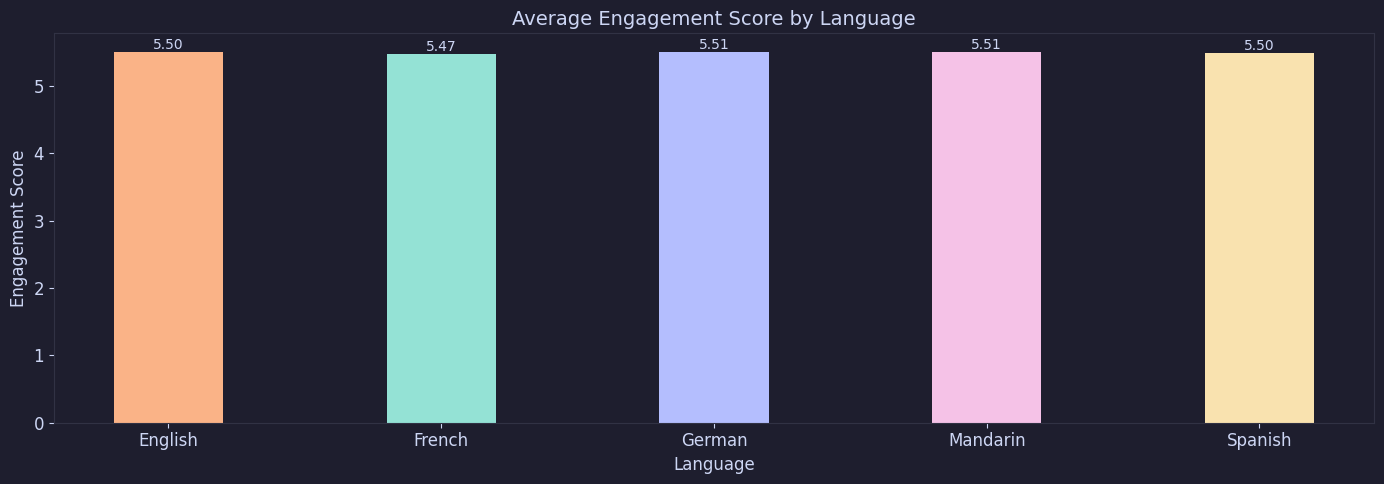

In [27]:
# GROUP METRICS BY LANGUAGE
lang_perf = df.groupby('Language').agg({
    'Conversion_Rate': 'mean',
    'ROI': 'mean',
    'Engagement_Score': 'mean'
}).reset_index()

# BAR CHART: AVERAGE CONVERSION RATE BY LANGUAGE
plt.figure(figsize=(14, 5))
bars = plt.bar(lang_perf['Language'], lang_perf['Conversion_Rate'],
               color=mocha_colors,  
               width=0.4)

plt.title('Average Conversion Rate by Language', fontsize=14)
plt.xlabel('Language')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

# BAR CHART: AVERAGE ROI BY LANGUAGE
plt.figure(figsize=(14, 5))
bars = plt.bar(lang_perf['Language'], lang_perf['ROI'],
               color=mocha_colors,  
               width=0.4)

plt.title('Average ROI by Language', fontsize=14)
plt.xlabel('Language')
plt.ylabel('ROI')
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

# BAR CHART: AVERAGE ENGAGEMENT SCORE BY LANGUAGE
plt.figure(figsize=(14, 5))
bars = plt.bar(lang_perf['Language'], lang_perf['Engagement_Score'],
               color=mocha_colors,  
               width=0.4)

plt.title('Average Engagement Score by Language', fontsize=14)
plt.xlabel('Language')
plt.ylabel('Engagement Score')
plt.xticks(rotation=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(False)
plt.show()

Language-based performance shows high consistency across the board (CR: 7.99–8.03%, ROI: 4.99–5.01, Engagement: 5.47–5.51), reflecting the success of the multilingual strategy.

French and Mandarin campaigns lead slightly in both Conversion Rate and ROI (above 8.02% and at 5.01), while German and Mandarin users show the highest engagement (5.51).

On the other end, Spanish underperforms slightly in both CR (7.99%) and ROI (5.00), and French audiences record the lowest engagement (5.47), suggesting opportunities for improved relevance or content calibration.

##### Geographic & Language Insights: Key Highlights and Recommendations

Performance across different locations and languages shows a high degree of consistency across all KPIs—Conversion Rate, ROI, and Engagement Score—reflecting a well-executed and balanced campaign deployment. While most metrics fall within narrow bands, subtle performance variations across regions and language groups point to opportunities for further optimization through localized insights.

**Notable Observations**

- Consistent Baseline with Nuanced Differences: Most cities and languages perform within tight KPI ranges (e.g., CR: 7.99–8.03%, ROI: 4.98–5.01), suggesting system-wide stability. However, some pockets—such as New York and Spanish-speaking audiences—show signs of underperformance in ROI and engagement despite strong top-funnel metrics.

- Regional and Language-Based Strengths: Cities like Houston, Los Angeles, and Chicago deliver strong all-around results, combining high conversion with strong engagement and healthy ROI. Similarly, Mandarin and French language campaigns lead in profitability and conversion, while German and Mandarin audiences show the strongest engagement behavior.

**Strategic Recommendations**

- Scale High-Performing Markets: Prioritize campaign investment in Houston, Los Angeles, and Chicago to capitalize on their consistent strength across all KPIs. For language, continue leveraging Mandarin and French audiences to drive conversions and returns efficiently.

- Reoptimize Underperforming Segments: In New York, improve mid- and bottom-funnel strategies to better convert its high click-through rates into actual ROI and engagement. Likewise, reevaluate the creative and targeting approach for Spanish-speaking audiences, whose conversion and ROI slightly lag behind.

- Tailor Engagement for Cultural Fit: Enhance content relevance for French-speaking markets, where engagement scores are slightly lower, by refining messaging and delivery formats. Leverage best practices from high-engagement languages like German and Mandarin to inform content strategy across all segments.

#### VI. Strategic Cross-Analysis & Correlation

**1. Correlation Heatmap: ROI – Conversion Rate – Acquisition Cost – Engagement Score**

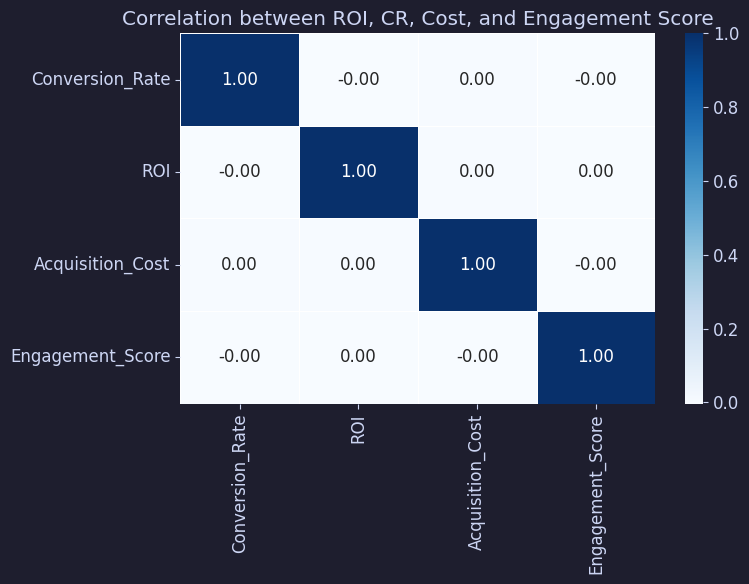

In [28]:
numeric_cols = ['Conversion_Rate', 'ROI', 'Acquisition_Cost', 'Engagement_Score']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation between ROI, CR, Cost, and Engagement Score')
plt.tight_layout()
plt.show()

The correlation matrix shows near-zero linear relationships among Conversion Rate, ROI, Acquisition Cost, and Engagement Score, confirming that each KPI behaves independently at the aggregate level.

This suggests that improving one metric (e.g., Conversion Rate) will not inherently boost another (e.g., ROI), highlighting the need for deeper segment-level, channel-level, or non-linear analysis to uncover actionable drivers of performance.

**2. Top-Performing Combinations**

In [29]:
# GROUP COMBINATIONS AND CALCULATE MEAN METRICS
grouped = df.groupby(['Campaign_Type', 'Channel_Used', 'Customer_Segment']).agg({
    'Conversion_Rate': 'mean',
    'ROI': 'mean',
    'Engagement_Score': 'mean'
}).reset_index()

# SORT BY ROI DESCENDING AND SELECT TOP 10
top_combinations = grouped.sort_values(by='ROI', ascending=False).head(10)

# OPTIONAL: FORMAT FLOATS FOR BETTER READABILITY
pd.set_option('display.float_format', '{:.2f}'.format)

# DISPLAY TOP COMBINATIONS
print("Top 10 Most Effective Campaign-Type × Channel × Segment Combinations by ROI:\n")
print(top_combinations)

# RESET DISPLAY OPTION (OPTIONAL)
pd.reset_option('display.float_format')

Top 10 Most Effective Campaign-Type × Channel × Segment Combinations by ROI:

    Campaign_Type Channel_Used     Customer_Segment  Conversion_Rate  ROI  \
23        Display      Website  Outdoor Adventurers             0.08 5.10   
69     Influencer     Facebook     Tech Enthusiasts             0.08 5.10   
26        Display      YouTube              Foodies             0.08 5.10   
70     Influencer   Google Ads         Fashionistas             0.08 5.09   
99         Search     Facebook     Tech Enthusiasts             0.08 5.09   
124  Social Media        Email     Tech Enthusiasts             0.08 5.09   
89     Influencer      YouTube     Tech Enthusiasts             0.08 5.08   
111        Search      Website              Foodies             0.08 5.07   
114        Search      Website     Tech Enthusiasts             0.08 5.07   
86     Influencer      YouTube              Foodies             0.08 5.07   

     Engagement_Score  
23               5.71  
69               5.58  
26

The top 10 campaign-type × channel × customer segment combinations deliver remarkably consistent performance, with Conversion Rates narrowly clustered between 8.07–8.08% and ROIs from 5.07 to 5.10—indicating repeatable success patterns.

*Leading combinations include*

- Display → Website → Outdoor Adventurers (highest ROI & engagement: 5.10 & 5.71)

- Influencer → Facebook → Tech Enthusiasts

- Display → YouTube → Foodies

These results reinforce the value of Display and Influencer campaigns when paired with high-trust channels (Website, Facebook) and highly specific audiences (Outdoor Adventurers, Tech Enthusiasts, Foodies).

##### Strategic Cross-Analysis & Correlation: Key Highlights and Recommendations

This section reveals deeper insights by evaluating KPI interdependencies and identifying top-performing campaign-channel-segment combinations. While high-level metrics may appear stable and uncorrelated, strategic pairings of campaign variables demonstrate that meaningful performance gains can be achieved through granular optimization.

**Notable Observations**

- No linear correlation exists among core KPIs (Conversion Rate, ROI, Acquisition Cost, Engagement Score), suggesting that improvements in one metric do not automatically drive changes in others.

- Despite this independence, the top-performing campaign combinations exhibit strong consistency—pairings of Display or Influencer campaigns with channels like Website, Facebook, or YouTube, targeted at Tech Enthusiasts, Foodies, or Outdoor Adventurers, consistently yield high ROI (≥5.07) and CR (≈8.08%).

- These combinations also deliver above-average engagement scores, indicating strong message-channel-audience alignment.

**Strategic Recommendations**

- Prioritize Proven Combinations for Scaling: Allocate greater budget and creative resources to Display campaigns on Website and Influencer campaigns on Facebook, especially when targeting Tech Enthusiasts and Foodies—segments that consistently deliver both ROI and engagement.

- Avoid One-Metric Optimization: Since KPIs operate independently, avoid focusing on a single metric. For example, improving Conversion Rate does not guarantee ROI uplift unless channel and audience alignment is optimized simultaneously.

- Deepen Segment-Channel Strategy: Use the top-performing combinations as blueprints to guide targeting strategies for other segments. Look for scalable patterns such as owned media (Website) + niche audiences or influencer-driven awareness + social validation channels.

- Complement Correlation Insights with Non-Linear & Cluster Analyses: Explore further techniques like clustering or decision trees to identify hidden drivers of ROI and engagement that aren’t captured through correlation matrices.

### E. Overall Summary & Strategic Outlook

The marketing campaign performance reveals a well-balanced, tightly managed system across campaign types, audience segments, channels, time periods, and geographic/language profiles. Across all dimensions, the KPIs—Conversion Rate (~8%), ROI (~5.00), Engagement Score (~5.5), and Acquisition Cost (~$12,500)—exhibit remarkable consistency, reflecting mature planning, execution discipline, and controlled resource allocation.

**Key Strategic Insights**
- *Consistency as Strength, but also a Limitation*: The high level of stability across metrics and dimensions indicates an efficient, standardized approach. However, it also suggests a plateau in discoverable lift through top-level optimizations alone. Greater improvements may now depend on more granular, audience-specific refinements, especially in channel targeting and creative personalization.

- *Top-Performing Micro-Strategies Exist*: Despite the broad consistency, standout combinations such as Influencer campaigns via Email for women aged 25–44, or Display campaigns on Website for Outdoor Adventurers, reveal valuable high-ROI opportunities. These patterns emphasize the need to scale what works—not by overhauling the entire campaign structure, but by doubling down on high-potential intersections of campaign type × channel × segment.

- *Independent KPIs Require Multi-Lens Strategy*: The correlation heatmap confirms that Conversion Rate, ROI, Engagement, and Cost move independently. This underscores that performance gains will not come from optimizing a single metric in isolation. Instead, a multi-KPI optimization approach, tailored by audience and funnel stage, is essential.

**Strategic Outlook & Next Steps**
- *Segment-Level Personalization is the Growth Lever*: Future performance uplift will come less from broad reallocation and more from refining messaging, creative, and channel mix at the segment level—particularly for segments like Tech Enthusiasts, Foodies, and Women 25–44, which repeatedly emerge in top-performing patterns.

- *Protect Baseline, Experiment with Edges*: The current strategy has created a reliable baseline across channels and geographies. The next evolution should involve controlled A/B testing in areas showing slight underperformance (e.g., Instagram, Spanish-speaking users, mid-year campaigns)—without risking the overall efficiency.

- *Build a Scalable Optimization Playbook*: Document and replicate success from top combinations (e.g., Display + Website, Influencer + Facebook) across similar audience types. This forms the foundation for a repeatable, insight-driven playbook for future campaigns.